# THE SPARKS FOUNDATION

## Data Science and Business Analytics Internship


### Author : Lalitagauri Walimbe


## TASK : Perform Exploratory Data Analysis - Retail


# Importing Libraries 

In [293]:
#Importing all the required libraries
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

# Loading the dataset

In [294]:
df= pd.read_csv(r'C:\Users\hp\Downloads\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [295]:
df.shape #Data set contains 9994 rows and 13 columns.

(9994, 13)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [297]:
#Checking the null values in the dataset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [298]:
#Checking the duplicates
df.duplicated().sum()

17

### Dropping the duplicate data entries.

In [299]:
#There are 17 duplicated data present in the dataset. Hence, we can remove it using drop duplicates function.
df.drop_duplicates(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [300]:
#From the above result, we can see that, there are no more duplicate values in the data set
df.duplicated().sum()

0

In [301]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [302]:
#Droping the unwanted column
pa =df.drop(["Postal Code"], axis=1,inplace= True)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Region        9977 non-null   object 
 6   Category      9977 non-null   object 
 7   Sub-Category  9977 non-null   object 
 8   Sales         9977 non-null   float64
 9   Quantity      9977 non-null   int64  
 10  Discount      9977 non-null   float64
 11  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1013.3+ KB


In [304]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


# Correlation using Heatmap

<AxesSubplot:>

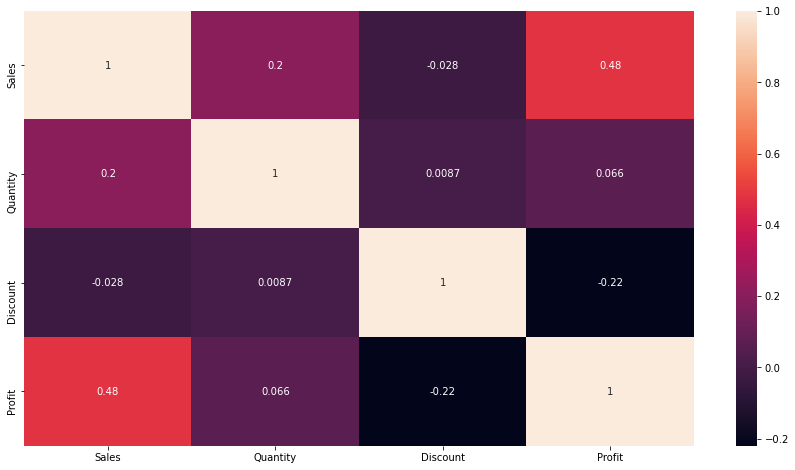

In [305]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True)

## Checking the Category

In [307]:
df["Category"].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

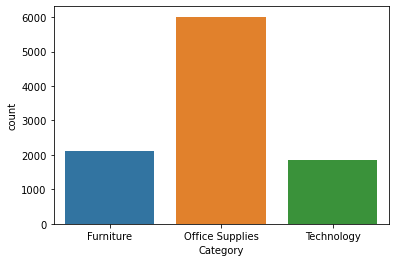

In [308]:
sns.countplot(x= df['Category'])

#### From the above plot it can be concluded that there are three categories . Office Supplies has highest number of sales.

## Checking the sub-categories.

In [309]:
df["Sub-Category"].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

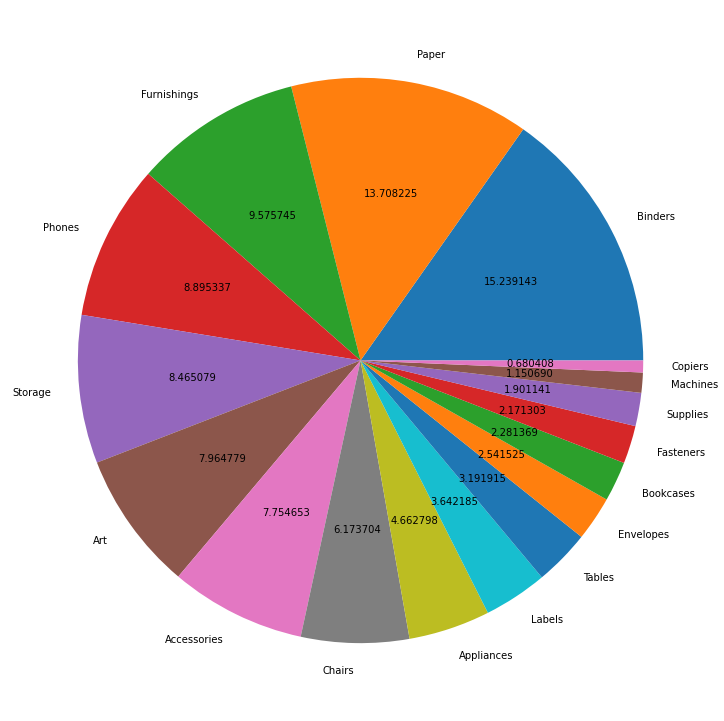

In [310]:
plt.figure(figsize=(15,13))
plt.pie(data["Sub-Category"].value_counts(), labels= data["Sub-Category"].value_counts().index, autopct ="%2f")
plt.show()

#### Sub-Category with highest sale is Binder, followed by Paper and Furnishings as second and third respectively.

## Analysing the Shipping Modes 

In [311]:
df["Ship Mode"].value_counts()


Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

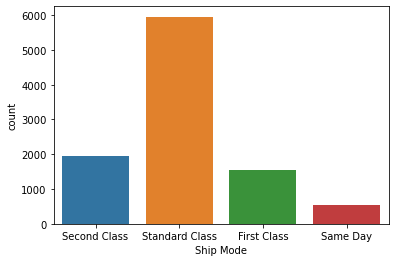

In [312]:
sns.countplot(x= df['Ship Mode'])

#### Standard class  shiping mode is having the highest count followed by second and the first class.

## Analysing the Segments

In [313]:
df["Segment"].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

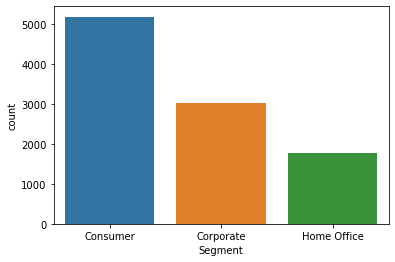

In [314]:
sns.countplot(x= df['Segment'])

#### From the plot we can see that the consumer segment is highest,while the home office is lowest.

In [315]:
st_profit=data.groupby(["State"])["Profit"].sum().nlargest(20)

In [316]:
st_profit

State
California       76381.3871
New York         74038.5486
Washington       33402.6517
Michigan         24463.1876
Virginia         18597.9504
Indiana          18382.9363
Georgia          16250.0433
Kentucky         11199.6966
Minnesota        10823.1874
Delaware          9977.3748
New Jersey        9772.9138
Wisconsin         8401.8004
Rhode Island      7285.6293
Maryland          7031.1788
Massachusetts     6785.5016
Missouri          6436.2105
Alabama           5786.8253
Oklahoma          4853.9560
Arkansas          4008.6871
Connecticut       3511.4918
Name: Profit, dtype: float64

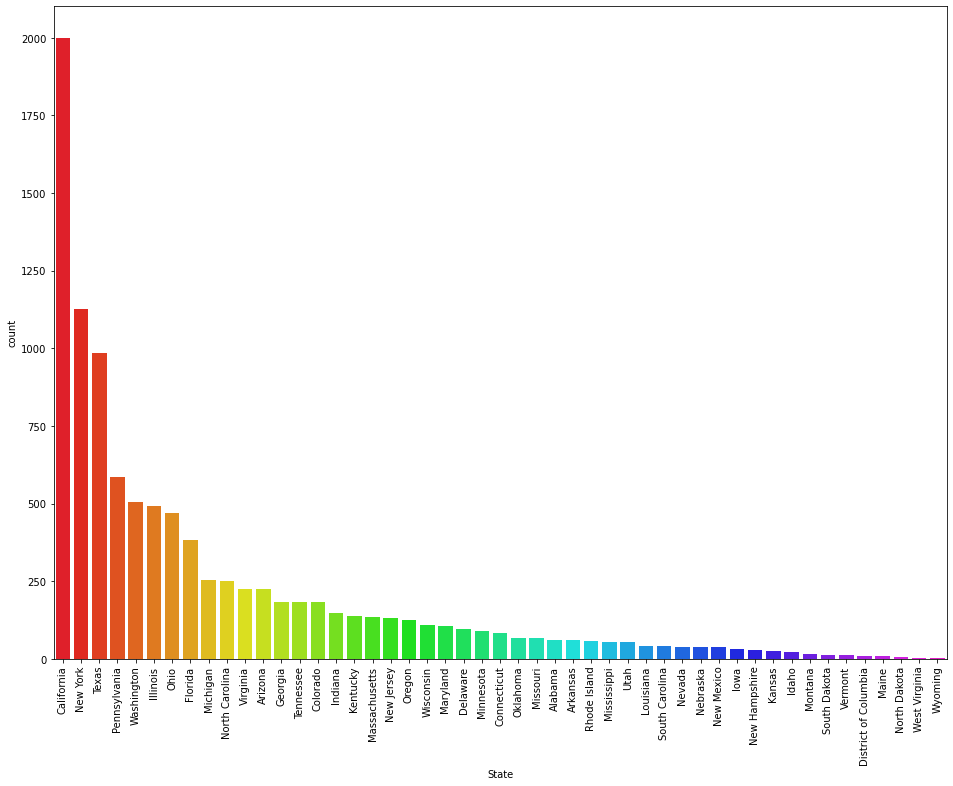

In [317]:
plt.figure(figsize=(16,12))
sns.countplot(x='State', data = data, palette= 'gist_rainbow',order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

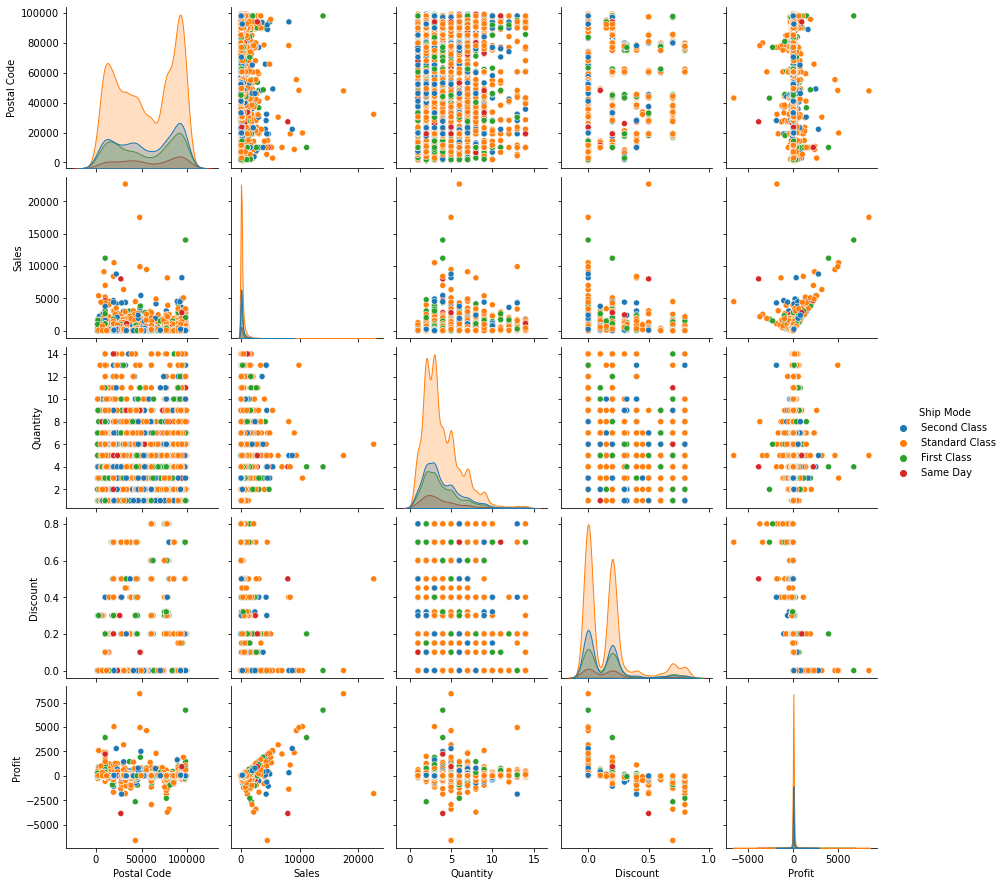

In [267]:
sns.pairplot(data, hue= 'Ship Mode')

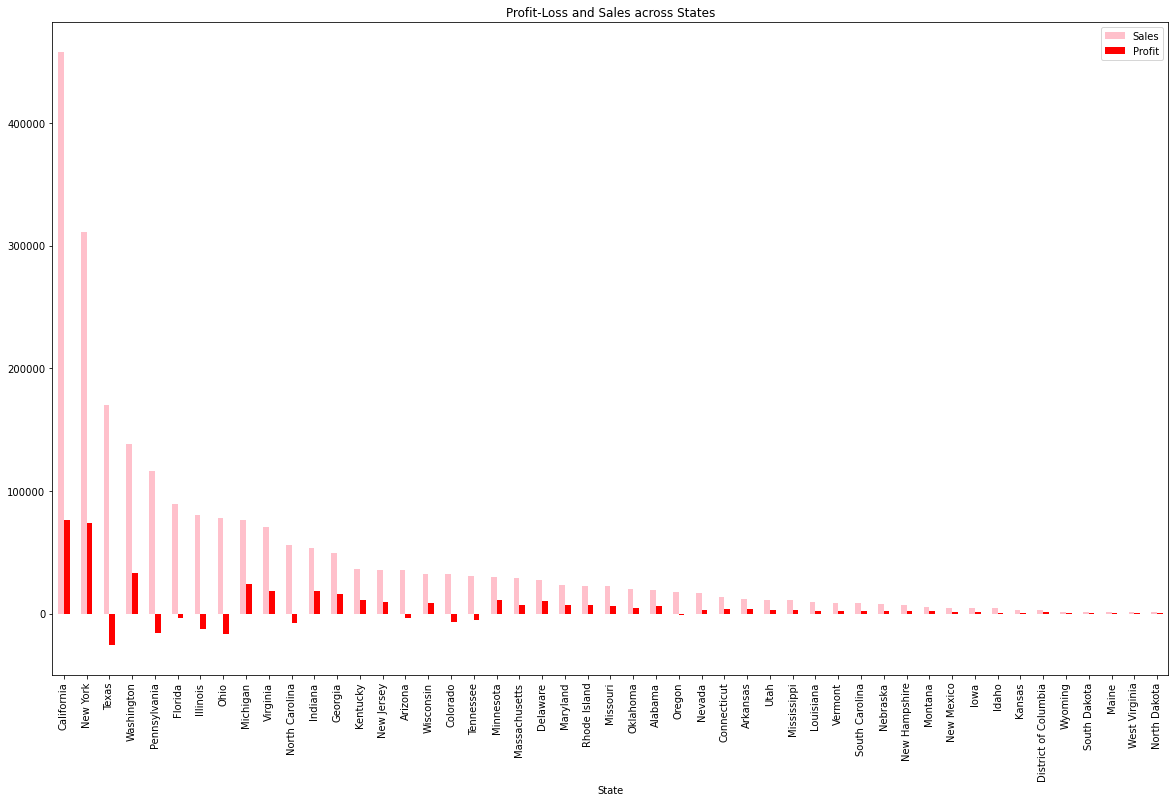

In [268]:
data1= data.groupby("State")[["Sales","Profit"]].sum().sort_values(by="Sales", ascending=False)
data1[:].plot.bar(color = ["pink","Red"], figsize=(20,12))
plt.title("Profit-Loss and Sales across States")
plt.show()


### California  generate more profit compared to the other states.

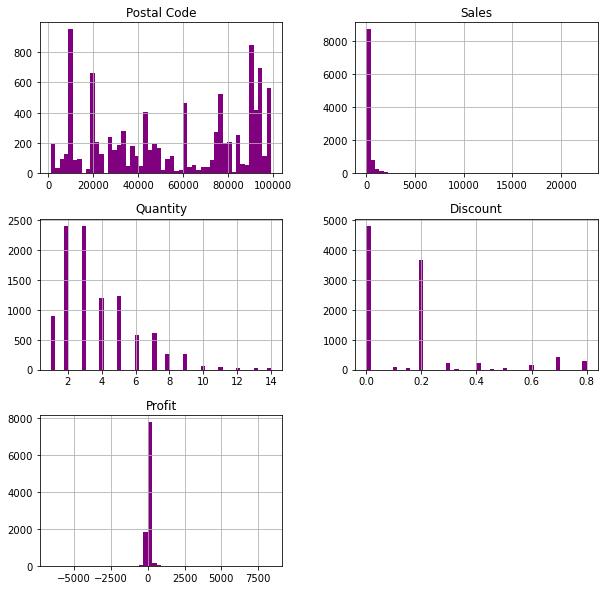

In [269]:
data.hist(figsize=(10,10), bins= 50,color="purple")
plt.show()

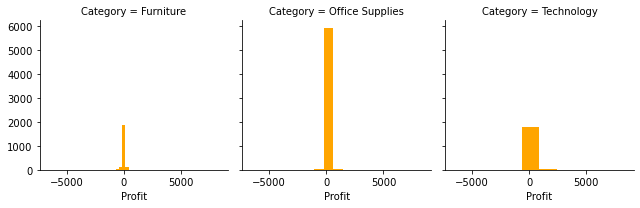

In [270]:
p = sns.FacetGrid(data, col ='Category')
p.map(plt.hist, 'Profit',color="orange")

### Maximum profit is in Office supplies.

<AxesSubplot:xlabel='Profit', ylabel='Count'>

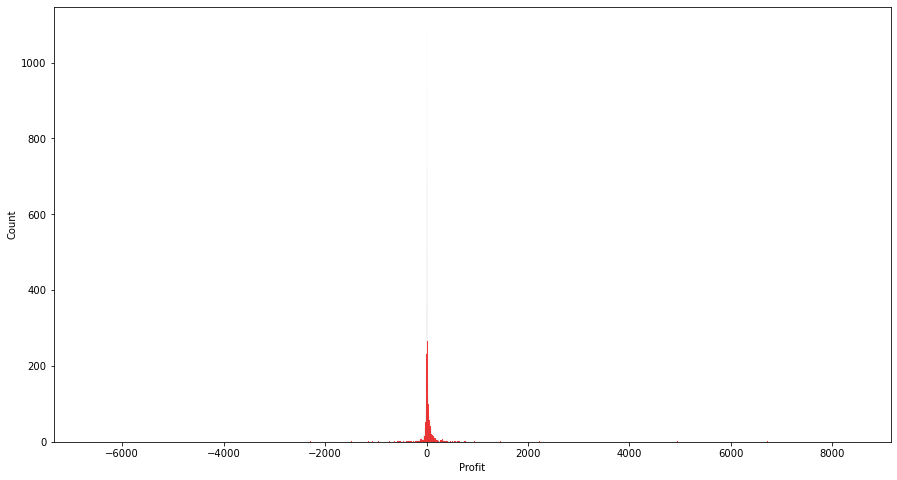

In [271]:
fig, axes = plt.subplots(figsize=(15,8))
sns.histplot(data.Profit,color="red")

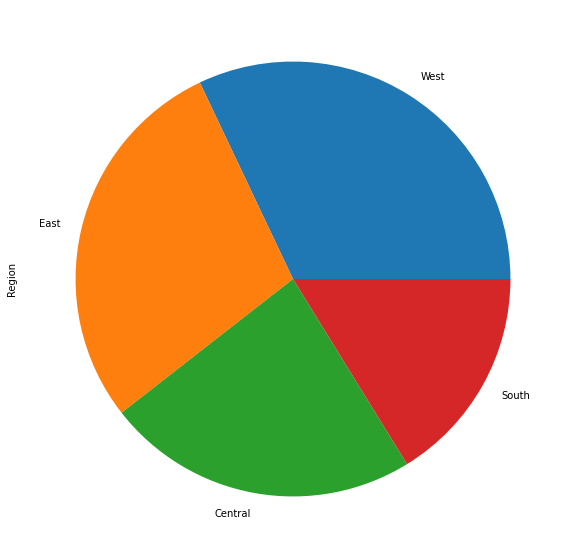

In [272]:
plt.figure(figsize=(15,10))
data['Region'].value_counts().plot.pie()
plt.show()

### The western region has the maximum sales.

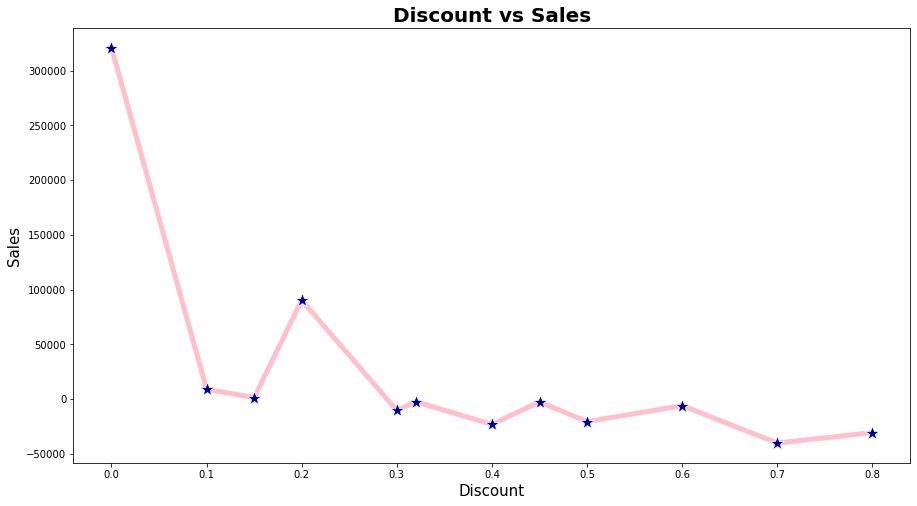

In [282]:
res9 = df.groupby('Discount').sum()
res9.loc[:,'Sales']
dis = [ dis for dis, df in df.groupby('Discount')]
plt.figure(figsize = (15,8))
sns.lineplot(dis,res9['Profit'], color = 'pink', marker = "*", markersize = 15, markerfacecolor = 'darkblue', linewidth = 5)
plt.title('Discount vs Sales', fontsize = 20, fontweight = 'bold')
plt.xlabel('Discount', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.show()

### From the above plot, we can infer that, the discount range of 0% that is, 0.0 gives more sales. Secondly, the discount range of 20% that is, 0.2 gives moderate sales.

# Conclusion:

1. From the above analysis, we can conclude that, 0% discount gives moderate sales with more profit and 20% discount gives        provides more sales with moderate quantity.

2.  California, Washington and NewYork generates the most sales compared to the other places.
 
3.  The Western region generates highest profit.
 
4.  The Central region generates lowest profit.
 
5.   Texas, Florida,Pennsylvenia, Illinois, Ohio and some other states are generating loss with high sale. Hence, we need to        give focus and attention towards them.
 
6.   Also, when there are no heavy discounts, there won't be much loss in profit and increases the profit and sales as         expected.
   Since, 0% discount provides sell sales with more quantity and more profit. Hence, I recommend to sell products at 0% discount, that is products with no discount at lowest price which makes more sales and more profit to the organization.

# Thank You!